<a href="https://colab.research.google.com/github/ldsAS/Tibame-AI-Learning/blob/main/Tibame20250509_LAB_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 完成後請寄到EMAIL : clement.class.02@gmail.com
* 信件主旨請設定為： 05-03.LAB_Automobile_學號_姓名  (例: "05-03.LAB_Automobile_00_陳仁政")
* 附件檔名請設定為： 05-03.LAB_Automobile_學號_姓名.ipynb (例: "05-03.LAB_Automobile_00_陳仁政.ipynb")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
data = pd.read_csv("../content/Automobile.csv")
data.head(10)

,symboling,Normalized-losses,make,Fuel-type,aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Engine-size,Fuel-system,bore,stroke,Compression-ratio,horsepower,Peak-rpm,City-mpg,Highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [ ]:
#查看資料筆數跟欄位數目
data.shape

(205, 26)

In [ ]:
# 檢查資料欄位的型態，以及缺失狀況
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   Normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   Fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   Num-of-doors       203 non-null    object 
 6   Body-style         205 non-null    object 
 7   Drive-wheels       205 non-null    object 
 8   Engine-location    205 non-null    object 
 9   Wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  Curb-weight        205 non-null    int64  
 14  Engine-type        205 non-null    object 
 15  Num-of-cylinders   205 non-null    object 
 16  Engine-size        205 non

In [ ]:
# 計算各欄位資料缺失狀況
data.isnull().sum()

,0
symboling,0
Normalized-losses,41
make,0
Fuel-type,0
aspiration,0
Num-of-doors,2
Body-style,0
Drive-wheels,0
Engine-location,0
Wheel-base,0


In [ ]:
# 查看一下資料的基本統計值
data.describe(include='all')
# 只看其中三筆
data[['symboling', 'Normalized-losses', 'make']].describe(include='all')

,symboling,Normalized-losses,make
count,205.000000,164.000000,205
unique,NaN,NaN,22
top,NaN,NaN,toyota
freq,NaN,NaN,32
mean,0.834146,122.000000,NaN
std,1.245307,35.442168,NaN
min,-2.000000,65.000000,NaN
25%,0.000000,94.000000,NaN
50%,1.000000,115.000000,NaN
75%,2.000000,150.000000,NaN


In [ ]:
# 那一個廠牌的車子數量最多？
data['make'].value_counts() # 方法一
data.groupby('make').size().sort_values(ascending=False) # 方法二

,0
make,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
volkswagen,12
volvo,11
peugot,11


In [ ]:
# 練習題
# 哪一種車型(Body-style)的數量最多？

In [ ]:
# 解法一.
most_body_style = data['Body-style'].value_counts()

print("各種車型的數量統計：")
print(most_body_style)

print("\n數量最多的車型：")
print(most_body_style.index[0], "，數量為：", most_body_style.iloc[0])

各種車型的數量統計：
Body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

數量最多的車型：
sedan ，數量為： 96


In [ ]:
# 解法二.
body_style_counts = data['Body-style'].value_counts()
most_body_style = body_style_counts.idxmax()
most_body_style_count = body_style_counts.max()
print(f"最多的車型是 {most_body_style}，共有 {most_body_style_count} 輛")

最多的車型是 sedan，共有 96 輛


# Label vs Number

In [ ]:
data.columns

Index(['symboling', 'Normalized-losses', 'make', 'Fuel-type', 'aspiration',
       'Num-of-doors', 'Body-style', 'Drive-wheels', 'Engine-location',
       'Wheel-base', 'length', 'width', 'height', 'Curb-weight', 'Engine-type',
       'Num-of-cylinders', 'Engine-size', 'Fuel-system', 'bore', 'stroke',
       'Compression-ratio', 'horsepower', 'Peak-rpm', 'City-mpg',
       'Highway-mpg', 'price'],
      dtype='object')

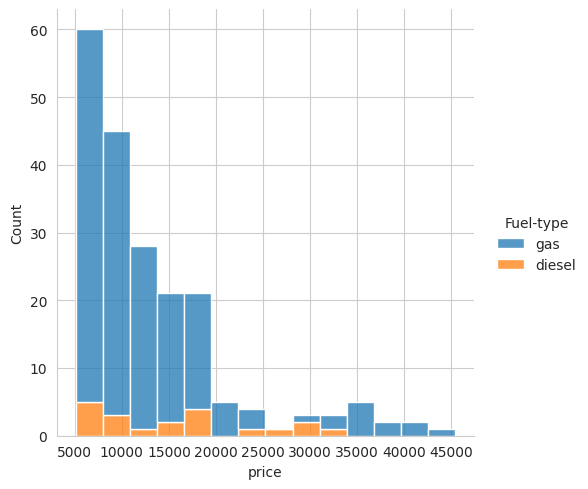

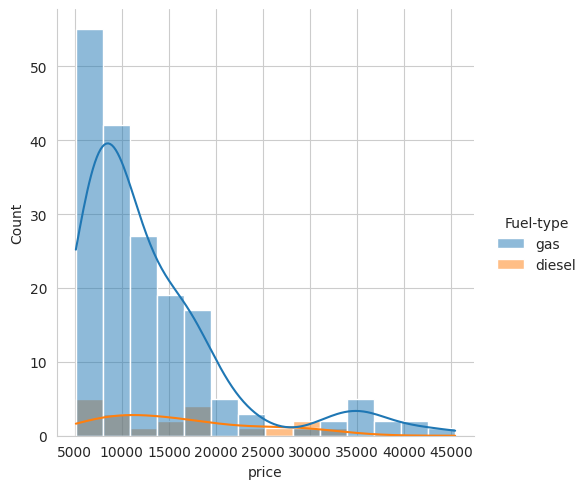

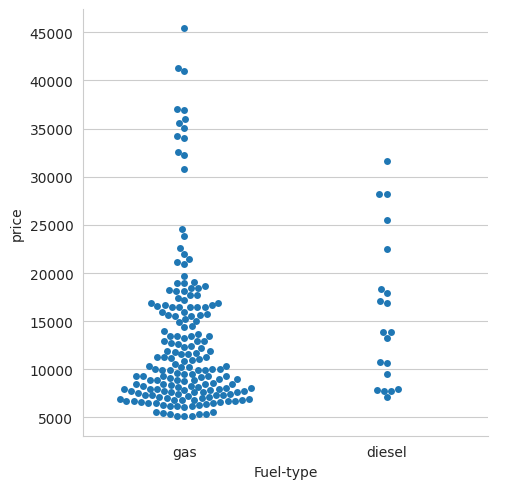

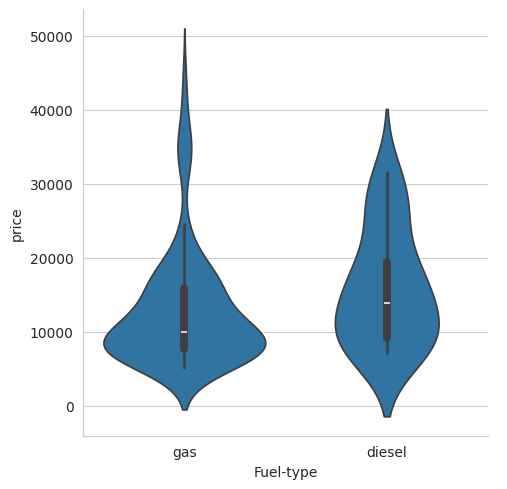

In [ ]:
# 畫出不同燃油型態Fuel-type的價格分布
sns.displot(data=data, x='price', hue='Fuel-type', multiple='stack')
sns.displot(data=data, x='price', hue='Fuel-type', kde=True)
sns.catplot(data, x='Fuel-type', y = 'price', kind='swarm')
sns.catplot(data, x='Fuel-type', y = 'price', kind='violin')

Body-style
convertible    157.166667
hardtop        176.250000
hatchback      114.400000
sedan          130.822917
wagon          123.840000
Name: Engine-size, dtype: float64
Body-style
convertible    47.288124
hardtop        60.970133
hatchback      31.125925
sedan          45.276692
wagon          26.872663
Name: Engine-size, dtype: float64


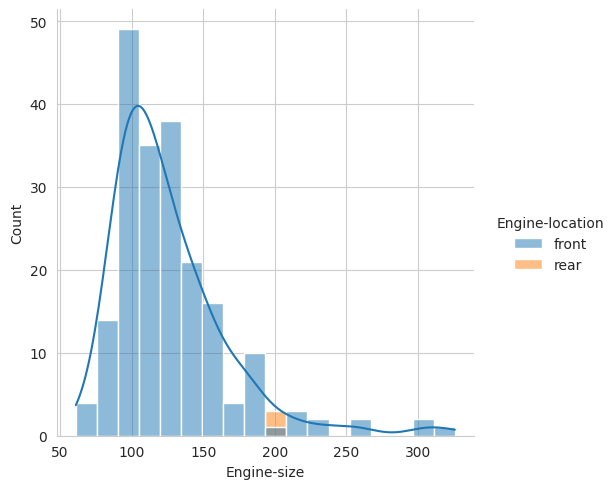

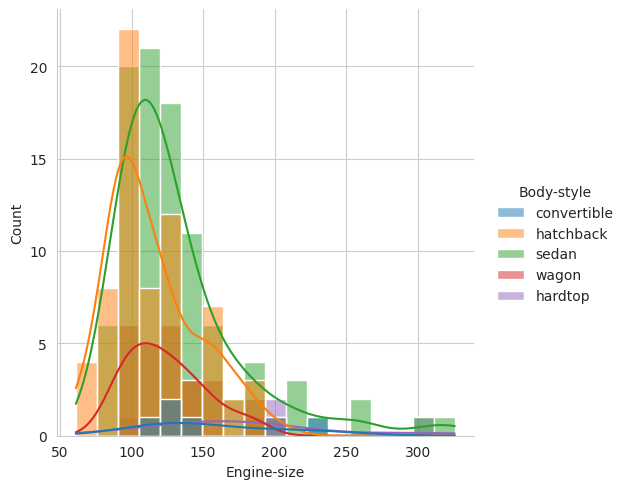

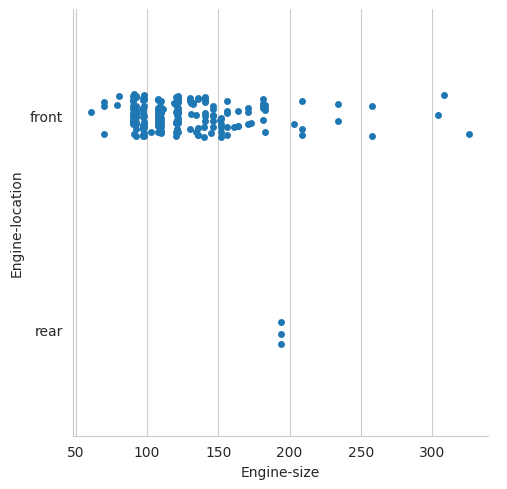

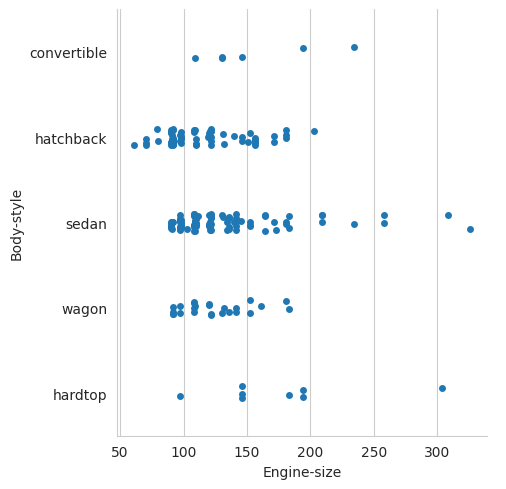

In [ ]:
# 找出引擎位置(Body-style)跟引擎大小(Engine-size)之間有沒有關係？

# data[['Body-style', 'Engine-location', 'Engine-size']].info()
# data['Engine-location'].value_counts()
# data['Body-style'].value_counts()

# fname = 'Body-style'
# fname = 'Engine-location'
# 計算平均值 (類別型資料)
# print(data.groupby(fname)['Engine-size'].mean())
# print(data.groupby(fname)['Engine-size'].std())
print(data.groupby('Body-style')['Engine-size'].mean())
print(data.groupby('Body-style')['Engine-size'].std())


# 計算相關性係數 (數值型資料)
# 若為字串資料，當其只有二種(像是Engine-location)，使用編碼(encode)才較合適
# data['Engine-location-encode'] = (data['Engine-location'] == 'front').astype('int32')
# data['Engine-location-encode'].corr(data['Engine-size'])
# data['horsepower'].corr(data['Engine-size'])
# data['price'].corr(data['Engine-size'])

# 畫直方圖
sns.displot(data=data, x='Engine-size', hue='Engine-location', kde=True)
sns.displot(data=data, x='Engine-size', hue='Body-style', kde=True)

# 畫分布圖
sns.catplot(data=data, x='Engine-size', y='Engine-location')
sns.catplot(data=data, x='Engine-size', y='Body-style')


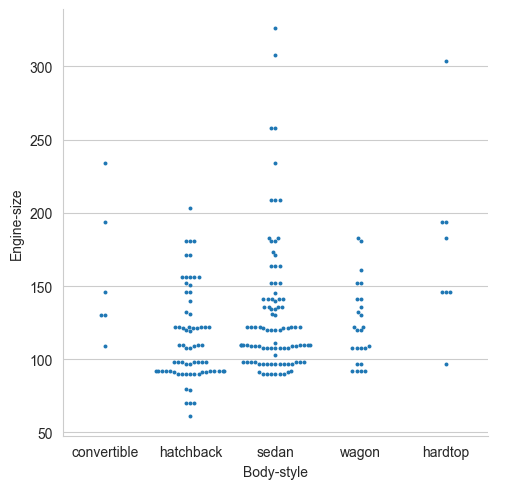

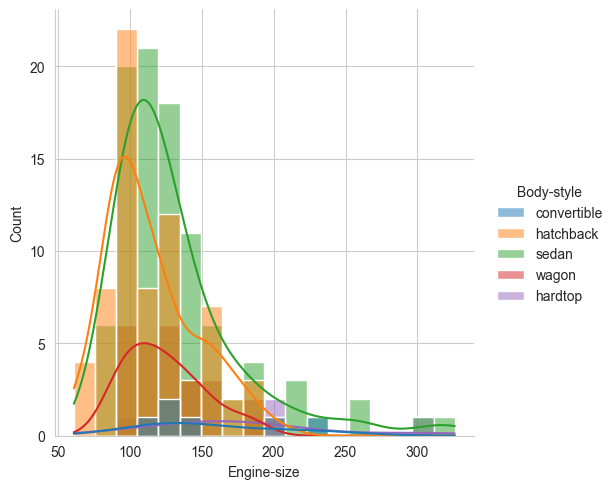

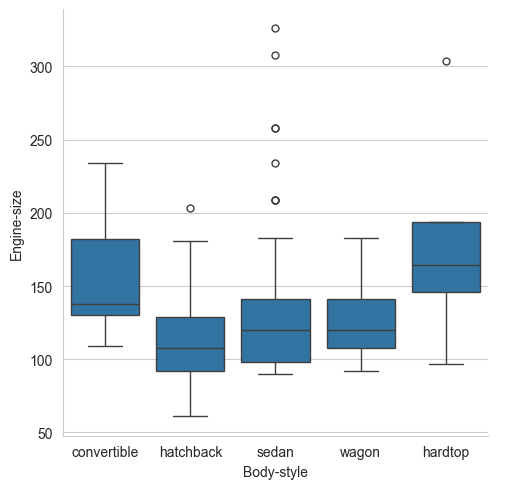

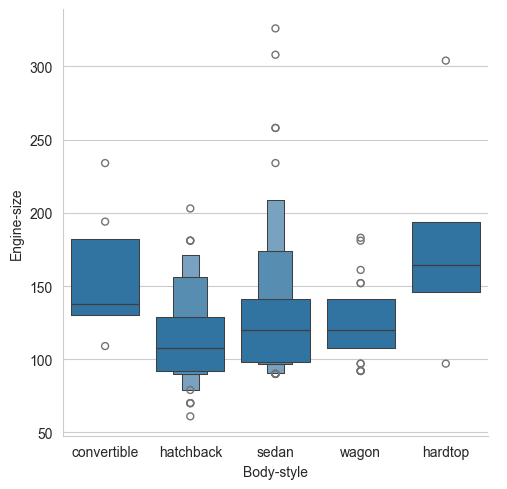

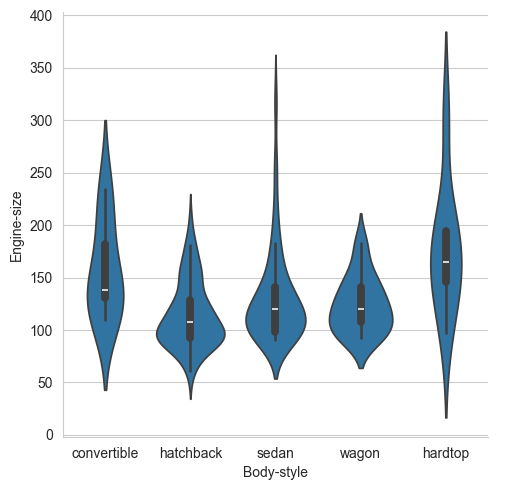

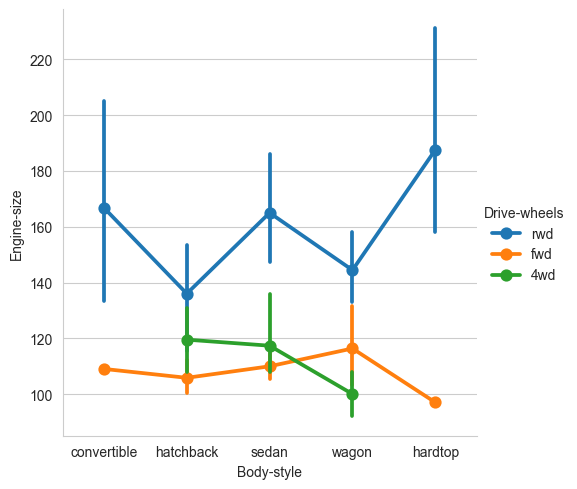

In [ ]:
# 找出引擎位置(Body-style)跟引擎大小(Engine-size)之間有沒有關係？
sns.catplot(data, x="Body-style", y="Engine-size", kind="swarm", s=8) #方法1
sns.displot(data, x="Engine-size", hue="Body-style", kde=True) #方法2
sns.catplot(data, x="Body-style", y="Engine-size", kind="box") #方法3
sns.catplot(data, x="Body-style", y="Engine-size", kind="boxen") #方法4
sns.catplot(data, x="Body-style", y="Engine-size", kind="violin") #方法5
sns.catplot(data, x="Body-style", y="Engine-size", kind="point") #方法6
# sns.catplot(data, x="Body-style", y="Engine-size", kind="point", hue='Drive-wheels') #方法7
plt.show()

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64
make
alfa-romero      1734.937559
audi             3452.379493
bmw              9263.832033
chevrolet         754.421633
dodge            2213.386044
honda            2061.672112
isuzu            3014.396208
jaguar           2047.559523
mazda            3975.682094
mercedes-benz    6789.560306
mercury     

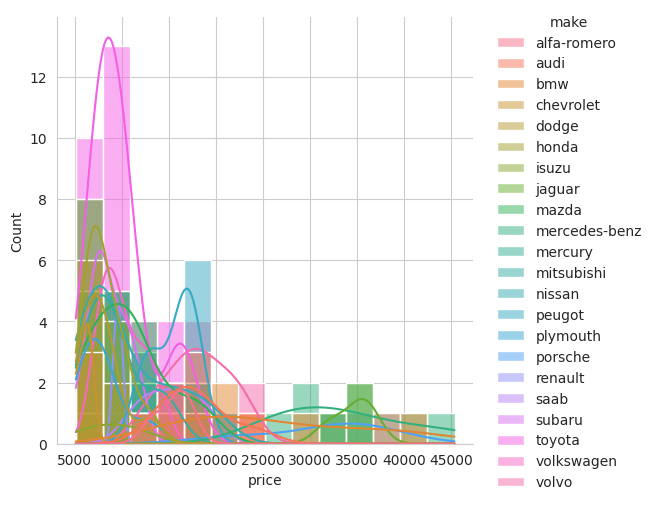

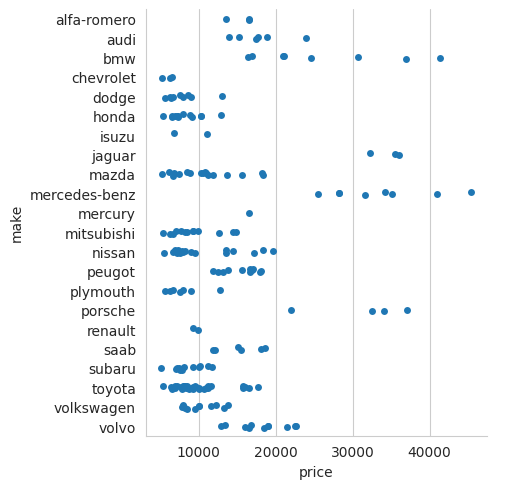

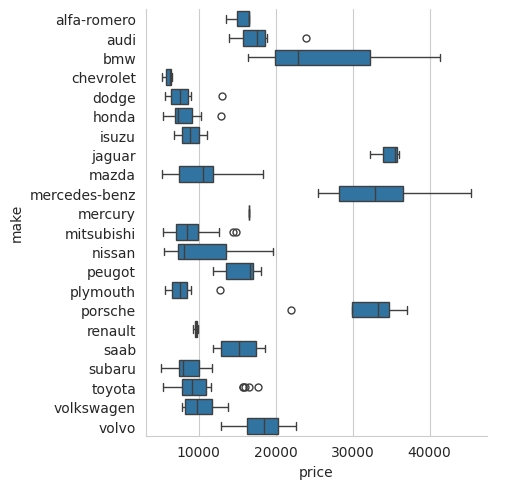

In [ ]:
# 練習題
# 找出廠牌跟價格之間有沒有關係？

print(data.groupby('make')['price'].mean())
print(data.groupby('make')['price'].std())

# 畫直方圖
sns.displot(data=data, x='price', hue='make', kde=True)

# 畫分布圖
sns.catplot(data=data, x='price', y='make')

sns.catplot(data, x="price", y="make", kind="box") # 盒鬚圖

Engine-type
dohc     146.000000
dohcv    288.000000
l         95.500000
ohc       93.698630
ohcf     110.400000
ohcv     169.538462
rotor    109.500000
Name: horsepower, dtype: float64
Engine-type
dohc     26.292066
dohcv          NaN
l        20.061270
ohc      29.682543
ohcf     51.462608
ohcv     32.821780
rotor    17.000000
Name: horsepower, dtype: float64


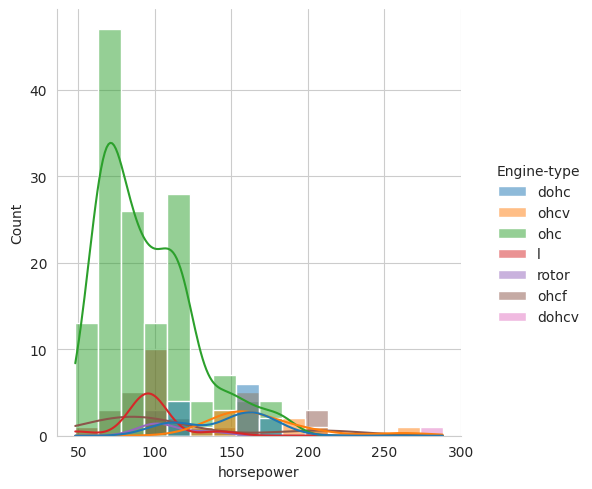

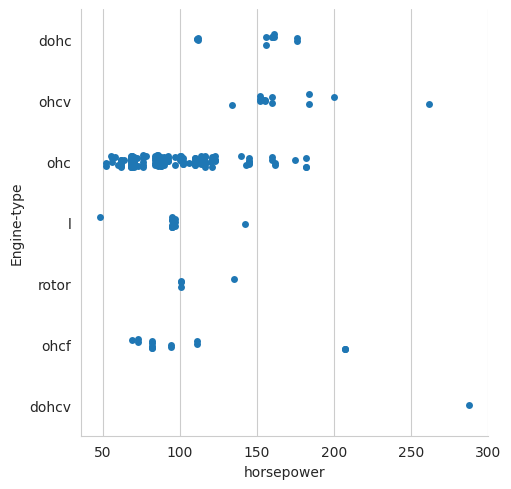

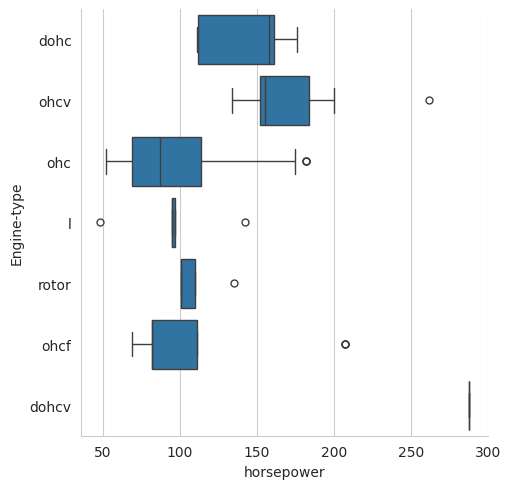

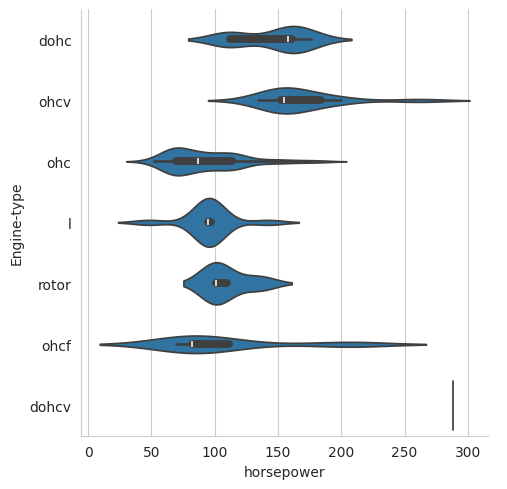

In [ ]:
# 練習題
# 找出Engine-type跟horsepower之間有沒有關係？

print(data.groupby('Engine-type')['horsepower'].mean())
print(data.groupby('Engine-type')['horsepower'].std())

# 畫直方圖
sns.displot(data=data, x='horsepower', hue='Engine-type', kde=True)

# 畫分布圖
sns.catplot(data=data, x='horsepower', y='Engine-type')

sns.catplot(data, x="horsepower", y="Engine-type", kind="box") # 盒鬚圖
sns.catplot(data, x="horsepower", y="Engine-type", kind="violin") # 小提琴圖

```
[ 講師補充說明 ]
relplot() 適合 number vs number
catplot() 適合 number vs label
displot() 適合 label vs label 或 單一label
以上三種都可以增加一個label欄位當成 hue 使用顏色來區分
```
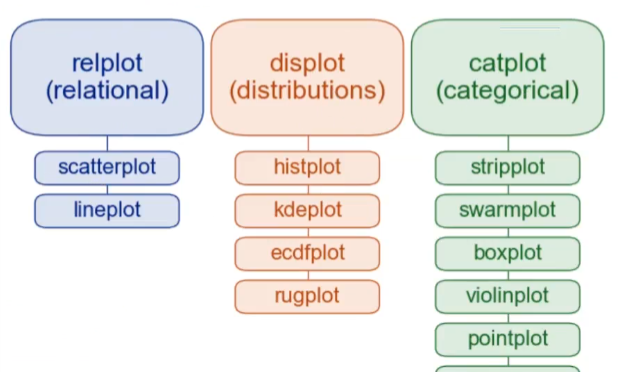

# Number vs Number

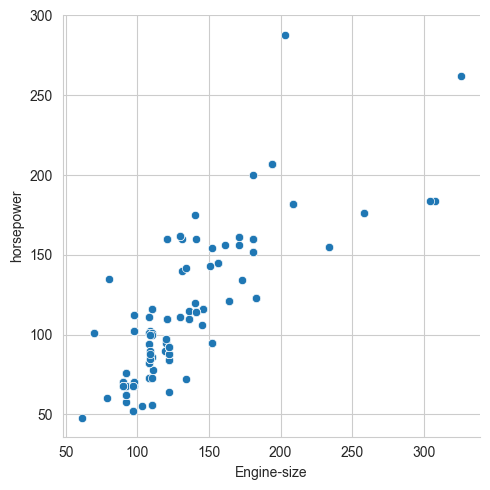

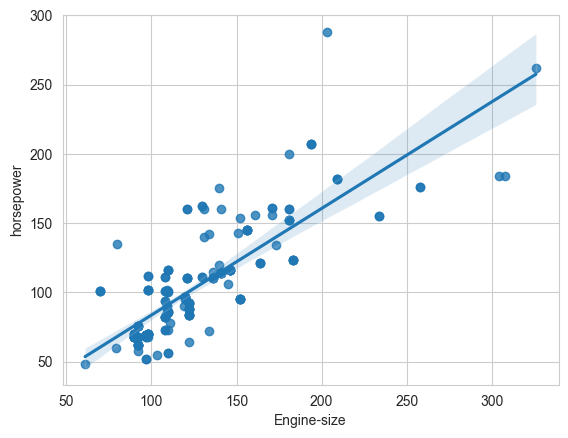

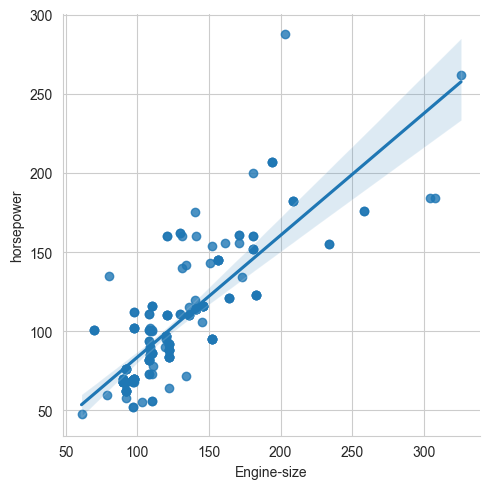

In [ ]:
# 找出引擎大小(Engine-size)跟馬力(horsepower)之間有沒有關係？
sns.relplot(data, x="Engine-size", y="horsepower") #方法1
plt.show()
sns.regplot(data, x="Engine-size", y="horsepower") #方法2
plt.show()
sns.lmplot(data, x="Engine-size", y="horsepower") #方法3
plt.show()

In [ ]:
# 計算引擎大小(Engine-size)跟馬力(horsepower)之間相關性係數
print('相關性係數=', data['Engine-size'].corr(data['horsepower']) ) # 方法1
print('相關性係數矩陣=', data[['Engine-size', 'horsepower']].corr()) # 方法2

相關性係數= 0.810772555995959
相關性係數矩陣=              Engine-size  horsepower
Engine-size     1.000000    0.810773
horsepower      0.810773    1.000000


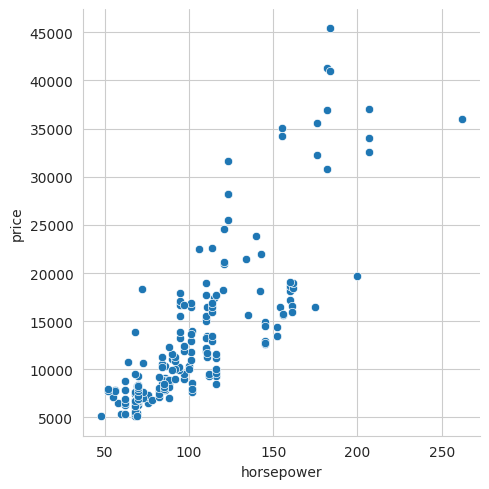

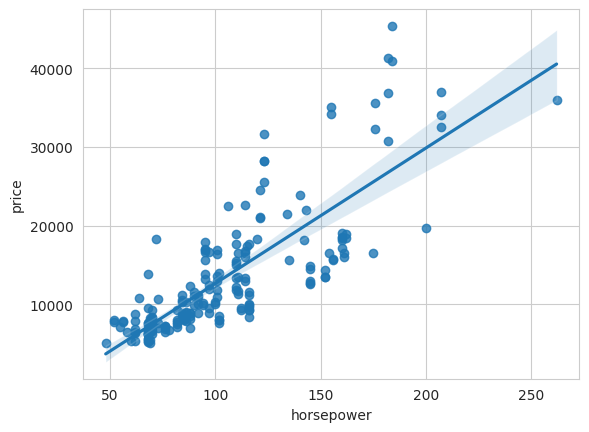

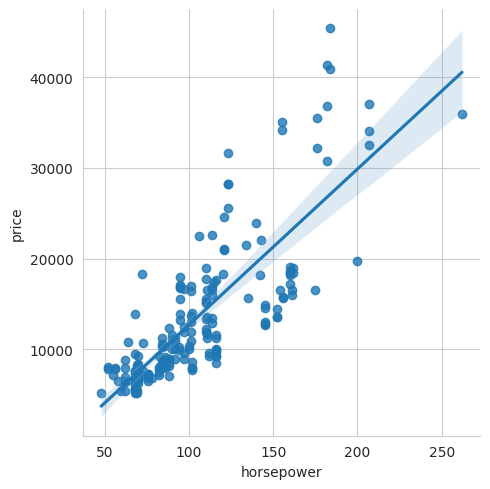

相關性係數= 0.8105330821322059
相關性係數矩陣=                price  horsepower
price       1.000000    0.810533
horsepower  0.810533    1.000000


In [ ]:
# 練習題
# 找出價格跟馬力之間有沒有關係？
sns.relplot(data, x="horsepower", y="price") #方法1
plt.show()
sns.regplot(data, x="horsepower", y="price") #方法2
plt.show()
sns.lmplot(data, x="horsepower", y="price") #方法3
plt.show()

print('相關性係數=', data['price'].corr(data['horsepower']) ) # 方法1
print('相關性係數矩陣=', data[['price', 'horsepower']].corr()) # 方法2

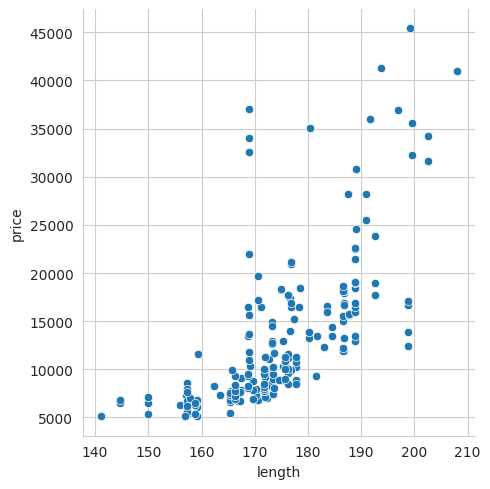

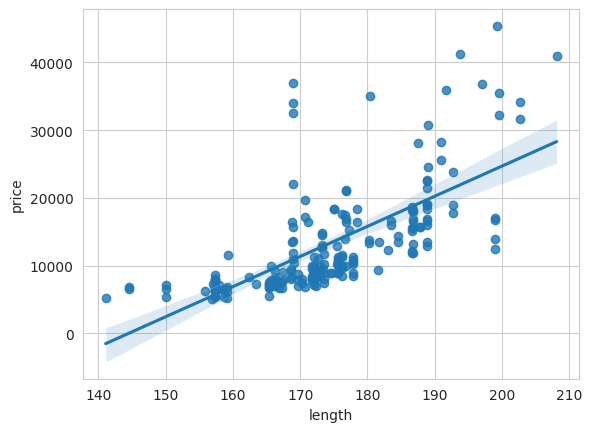

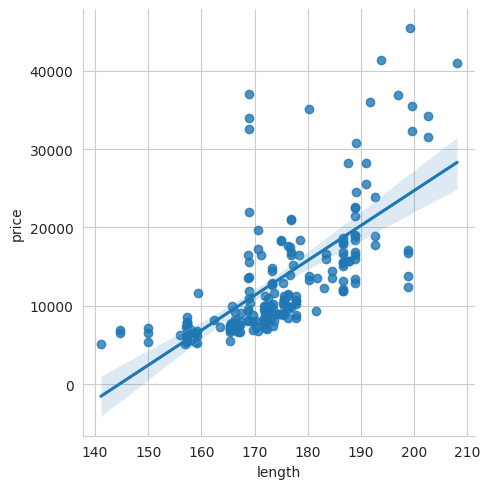

相關性係數= 0.6906283804483649
相關性係數矩陣=            price    length
price   1.000000  0.690628
length  0.690628  1.000000


In [ ]:
# 練習題
# 找出價格跟車長之間有沒有關係？
sns.relplot(data, x="length", y="price") #方法1
plt.show()
sns.regplot(data, x="length", y="price") #方法2
plt.show()
sns.lmplot(data, x="length", y="price") #方法3
plt.show()

print('相關性係數=', data['price'].corr(data['length']) ) # 方法1
print('相關性係數矩陣=', data[['price', 'length']].corr()) # 方法2

# Label vs Label

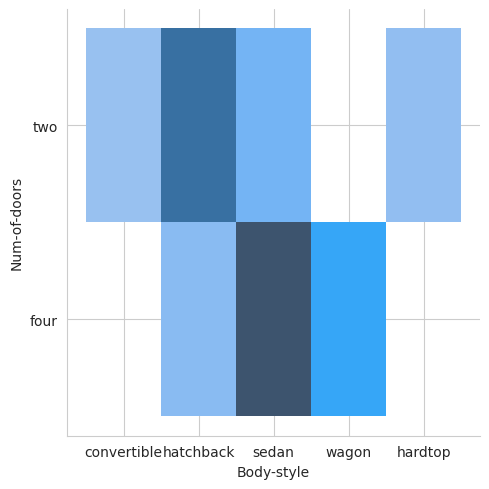

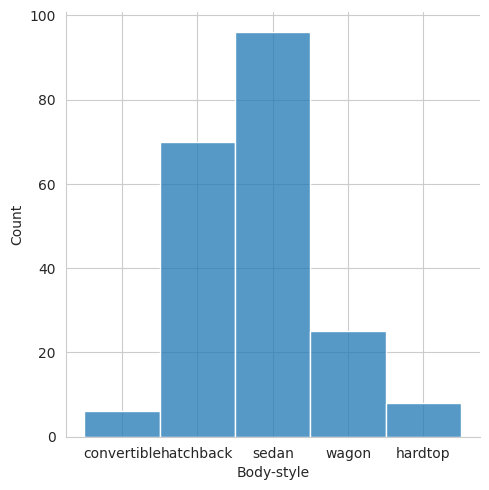

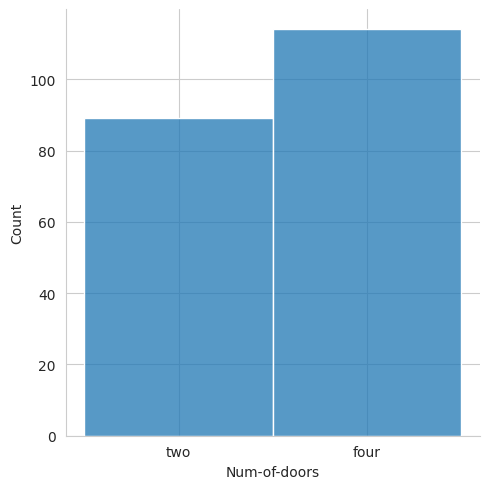

In [ ]:
# 找出Body-style跟Num-of-doors的關係
sns.displot(data=data, x='Body-style', y='Num-of-doors')
sns.displot(data=data, x='Body-style')
sns.displot(data=data, x='Num-of-doors')

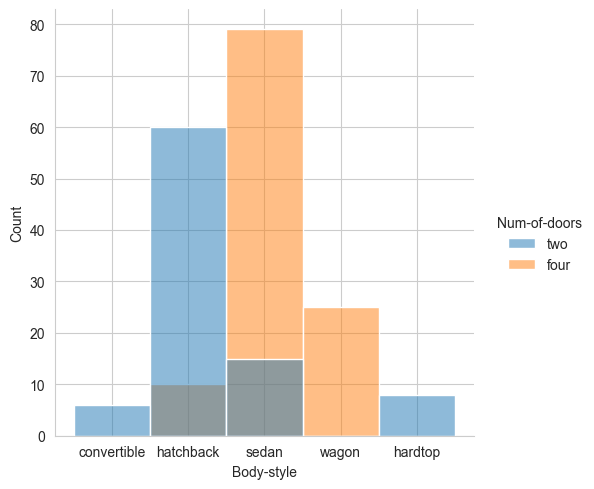

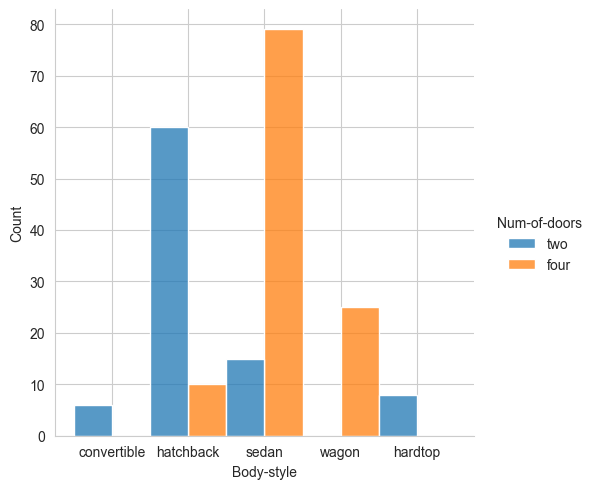

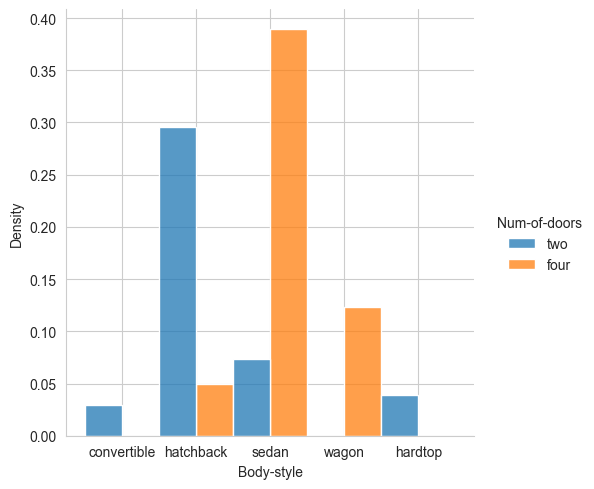

In [ ]:
# 找出Body-style跟Num-of-doors的關係
sns.displot(data,x='Body-style', hue='Num-of-doors') #方法1
sns.displot(data,x='Body-style', hue='Num-of-doors', multiple="dodge") #方法2
sns.displot(data,x='Body-style', hue='Num-of-doors', multiple="dodge", stat="density") #方法3

plt.show()

In [ ]:
# 計算Body-style跟Num-of-doors的計數矩陣
data.groupby(['Body-style','Num-of-doors']).size().unstack(fill_value=0)

Num-of-doors,four,two
Body-style,,
convertible,0,6
hardtop,0,8
hatchback,10,60
sedan,79,15
wagon,25,0


<Axes: xlabel='Num-of-doors', ylabel='Body-style'>

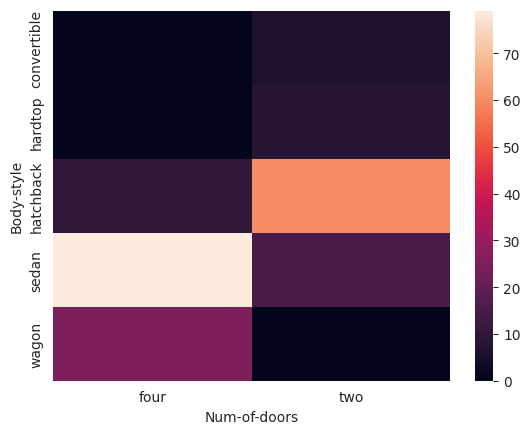

In [ ]:
# 畫出上個表格的熱圖
mt = data.groupby(['Body-style','Num-of-doors']).size().unstack(fill_value=0)
sns.heatmap(mt)

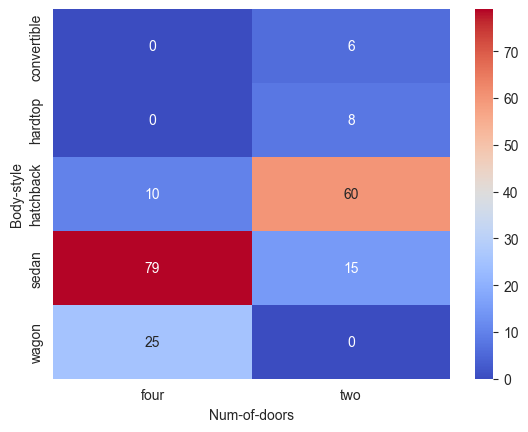

In [ ]:
# 畫出上個表格的熱圖
matrix = data.groupby(['Body-style','Num-of-doors']).size().unstack(fill_value=0)
sns.heatmap(matrix, annot=True, cmap='coolwarm', cbar=True)
plt.show()

make         alfa-romero  audi  bmw  chevrolet  dodge  honda  isuzu  jaguar  \
Body-style                                                                    
convertible            2     0    0          0      0      0      0       0   
hardtop                0     0    0          0      0      0      0       0   
hatchback              1     1    0          2      5      7      1       0   
sedan                  0     5    8          1      3      5      3       3   
wagon                  0     1    0          0      1      1      0       0   

make         mazda  mercedes-benz  ...  nissan  peugot  plymouth  porsche  \
Body-style                         ...                                      
convertible      0              1  ...       0       0         0        1   
hardtop          0              2  ...       1       0         0        2   
hatchback       10              0  ...       5       0         4        2   
sedan            7              4  ...       9       7       

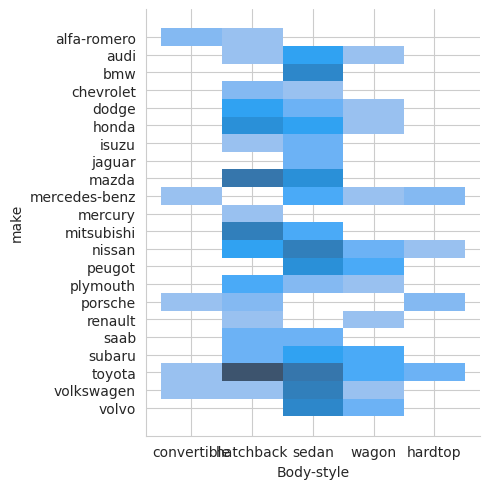

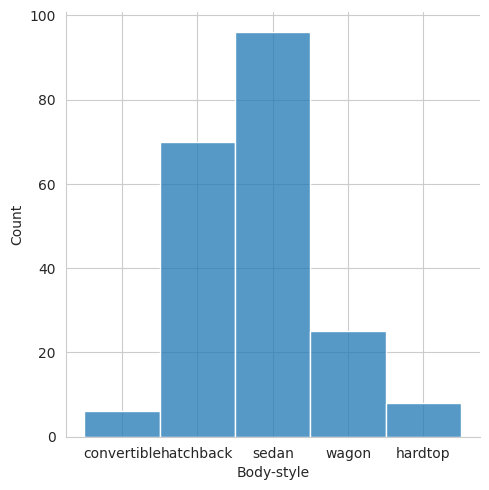

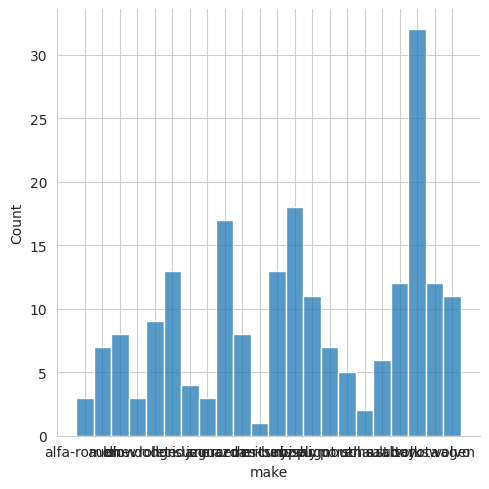

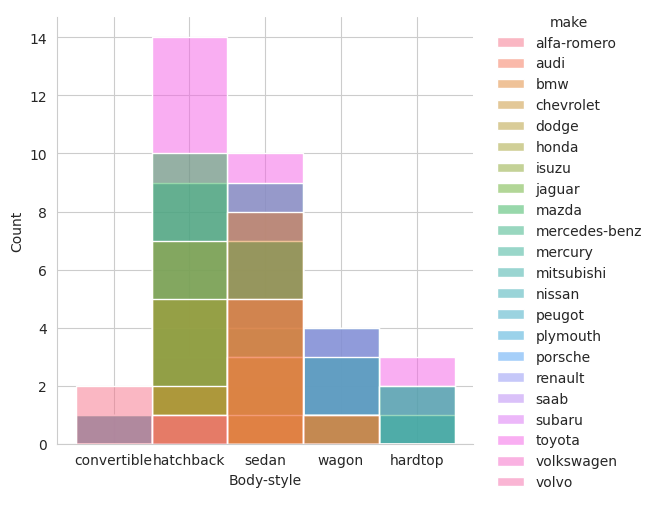

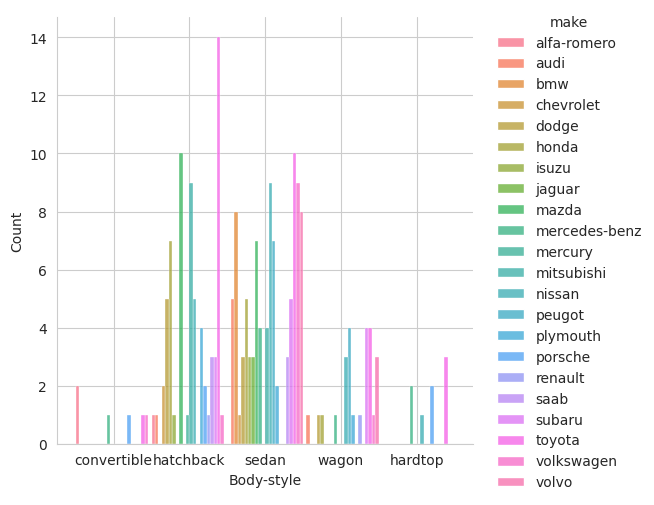

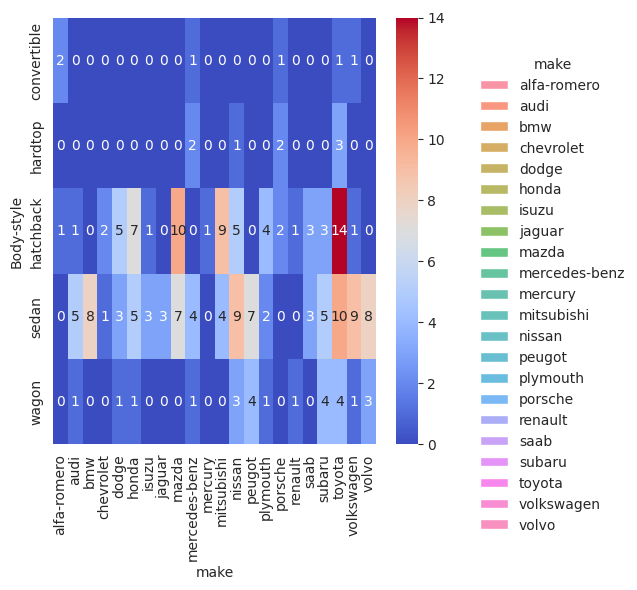

In [ ]:
# 練習題
# 找出Body-style跟廠牌的關係

data.groupby(['Body-style','make']).size().unstack(fill_value=0)

sns.displot(data=data, x='Body-style', y='make')
sns.displot(data=data, x='Body-style')
sns.displot(data=data, x='make')

sns.displot(data,x='Body-style', hue='make') #方法1
sns.displot(data,x='Body-style', hue='make', multiple="dodge") #方法2
sns.displot(data,x='Body-style', hue='make', multiple="dodge", stat="density") #方法3

matrix = data.groupby(['Body-style','make']).size().unstack(fill_value=0)
print(matrix)
sns.heatmap(matrix, annot=True, cmap='coolwarm', cbar=True)

plt.show()

# Group By

In [ ]:
data.groupby('make')['price'].mean().reset_index(name='MeanPrice')

,make,MeanPrice
0,alfa-romero,15498.333333
1,audi,17859.166667
2,bmw,26118.750000
3,chevrolet,6007.000000
4,dodge,7875.444444
5,honda,8184.692308
6,isuzu,8916.500000
7,jaguar,34600.000000
8,mazda,10652.882353
9,mercedes-benz,33647.000000


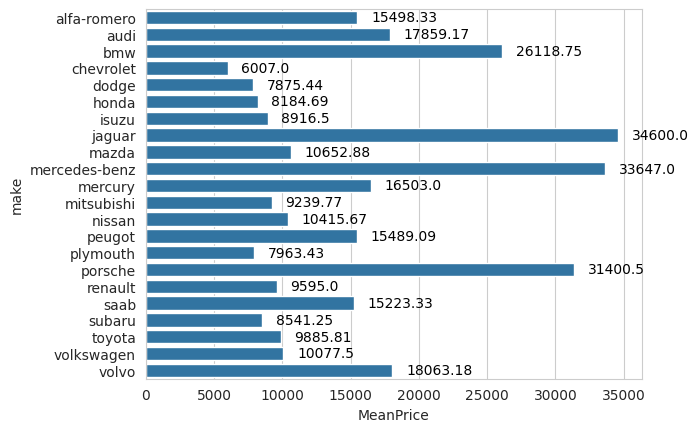

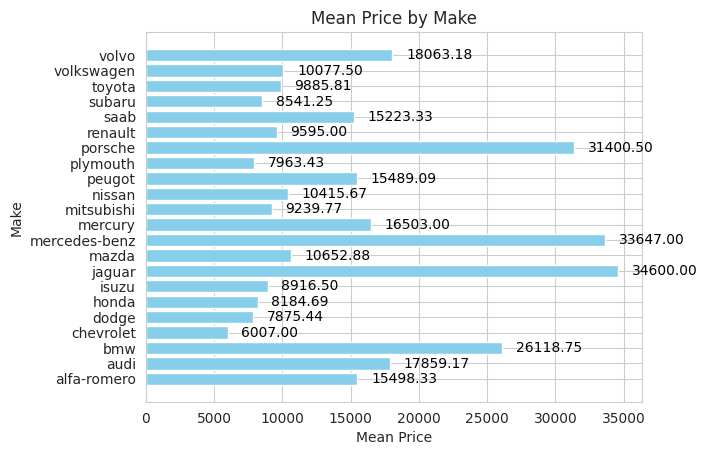

In [ ]:
# 計算不同廠牌汽車的平均價格，並畫出來

#方法一
mean_price = data.groupby('make')['price'].mean().reset_index(name='MeanPrice')
ax = sns.barplot(mean_price, x='MeanPrice', y='make')
for index, row in mean_price.iterrows():
    ax.text(row['MeanPrice'] + 1000,  # 偏移量，確保數字不會跟條形重疊
            index,
            round(row['MeanPrice'], 2),  # 顯示價格，保留兩位小數
            color='black',
            ha="left",  # 水平對齊
            va="center")  # 垂直對齊
plt.show()


#方法二
mean_price = data.groupby('make')['price'].mean().reset_index(name='MeanPrice')
bars = plt.barh(mean_price['make'], mean_price['MeanPrice'], color='skyblue')
# 在每個條形上顯示 MeanPrice 的數值
for bar in bars:
    # 使用 bar.get_width() 來獲取每個條形的長度（即價格）
    width = bar.get_width()
    plt.text(width + 1000,  # 偏移量，確保數字不會跟條形重疊
             bar.get_y() + bar.get_height() / 2,  # 垂直位置
             f'{width:.2f}',  # 顯示價格，保留兩位小數
             color='black',
             va='center')  # 垂直對齊

# 顯示圖表
plt.xlabel('Mean Price')
plt.ylabel('Make')
plt.title('Mean Price by Make')
plt.show()

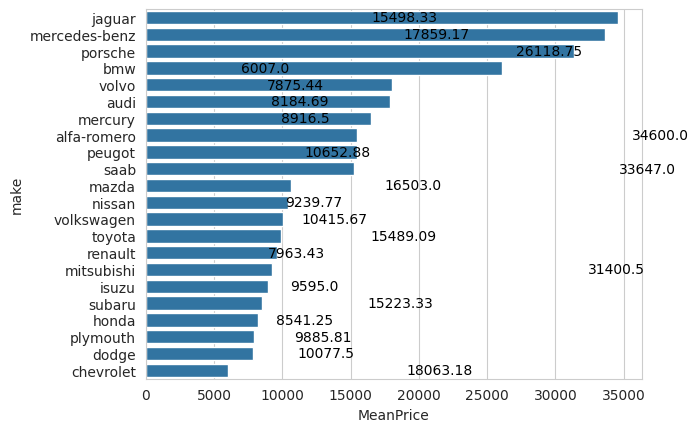

In [ ]:
# 練習題
# 修改上圖將平均價格由高到低排序
mean_price = data.groupby('make')['price'].mean().reset_index(name='MeanPrice')
mean_price_sorted = mean_price.sort_values(by='MeanPrice', ascending=False)

ax = sns.barplot(mean_price_sorted, x='MeanPrice', y='make')
for index, row in mean_price_sorted.iterrows():
    ax.text(row['MeanPrice'] + 1000,  # 偏移量，確保數字不會跟條形重疊
            index,
            round(row['MeanPrice'], 2),  # 顯示價格，保留兩位小數
            color='black',
            ha="left",  # 水平對齊
            va="center")  # 垂直對齊
plt.show()

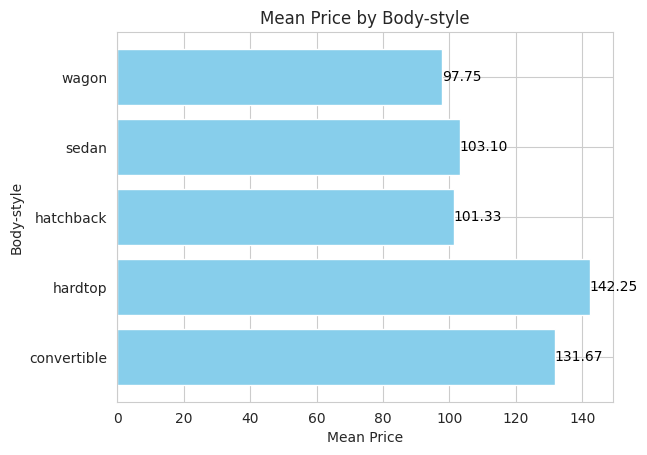

In [ ]:
# 練習題
# 計算不同車型的平均馬力
mean_price = data.groupby('Body-style')['horsepower'].mean().reset_index(name='MeanPrice')

bars = plt.barh(mean_price['Body-style'], mean_price['MeanPrice'], color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width,
             bar.get_y() + bar.get_height() / 2,  # 垂直位置
             f'{width:.2f}',  # 顯示價格，保留兩位小數
             color='black',
             va='center')  # 垂直對齊

# 顯示圖表
plt.xlabel('Mean Price')
plt.ylabel('Body-style')
plt.title('Mean Price by Body-style')
plt.show()

Body-style
convertible    170.383333
hardtop        176.937500
hatchback      166.592857
sedan          177.585417
wagon          181.304000
Name: length, dtype: float64
Body-style
convertible     7.241938
hardtop        11.645715
hatchback      10.561597
sedan          11.394680
wagon          11.640643
Name: length, dtype: float64


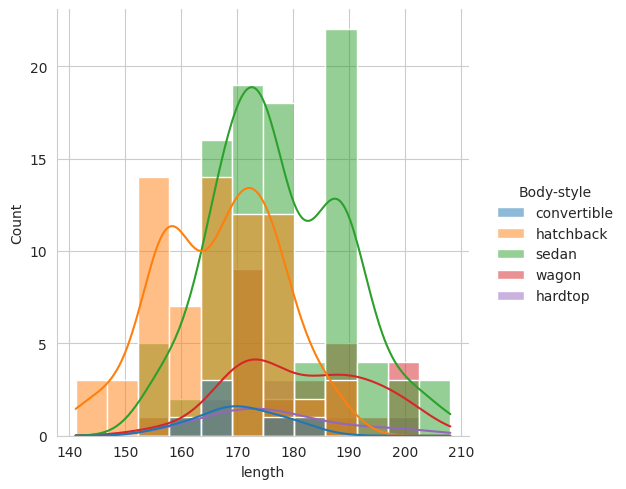

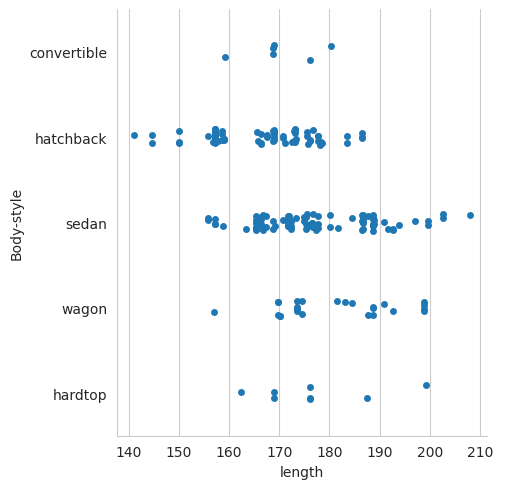

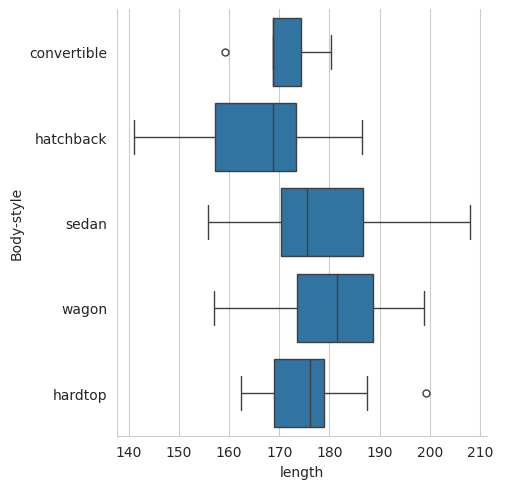

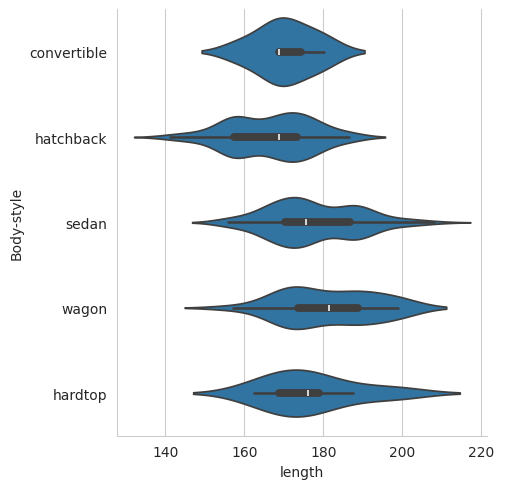

In [ ]:
# 練習題
# 找出車長與車種之間是否有關係？
print(data.groupby('Body-style')['length'].mean())
print(data.groupby('Body-style')['length'].std())

# 畫直方圖
sns.displot(data=data, x='length', hue='Body-style', kde=True)

# 畫分布圖
sns.catplot(data=data, x='length', y='Body-style')

sns.catplot(data, x="length", y="Body-style", kind="box") # 盒鬚圖
sns.catplot(data, x="length", y="Body-style", kind="violin") # 小提琴圖

Body-style     convertible  hardtop  hatchback  sedan  wagon
make                                                        
alfa-romero              2        0          1      0      0
audi                     0        0          1      5      1
bmw                      0        0          0      8      0
chevrolet                0        0          2      1      0
dodge                    0        0          5      3      1
honda                    0        0          7      5      1
isuzu                    0        0          1      3      0
jaguar                   0        0          0      3      0
mazda                    0        0         10      7      0
mercedes-benz            1        2          0      4      1
mercury                  0        0          1      0      0
mitsubishi               0        0          9      4      0
nissan                   0        1          5      9      3
peugot                   0        0          0      7      4
plymouth                

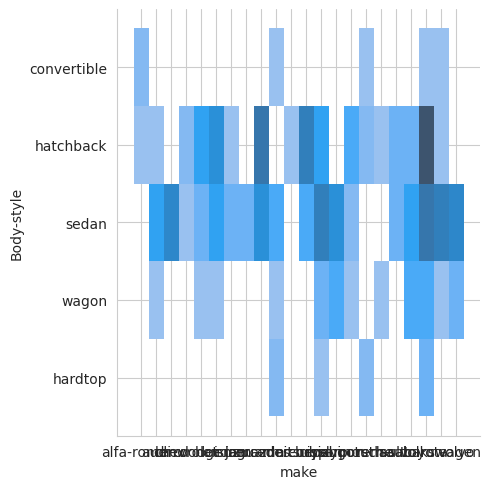

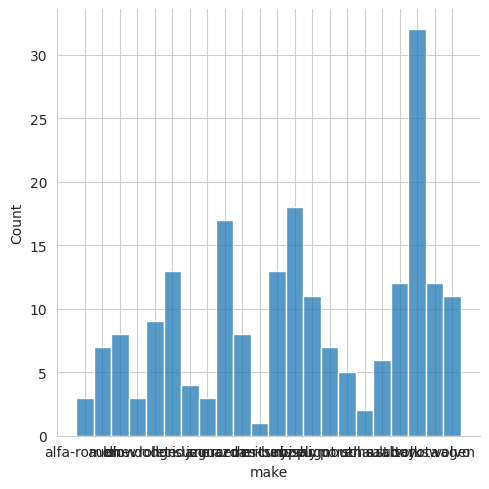

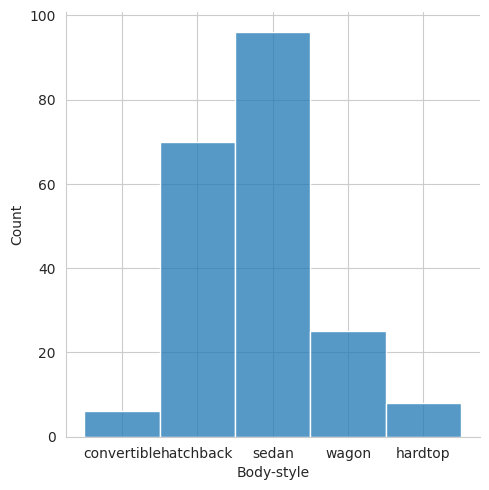

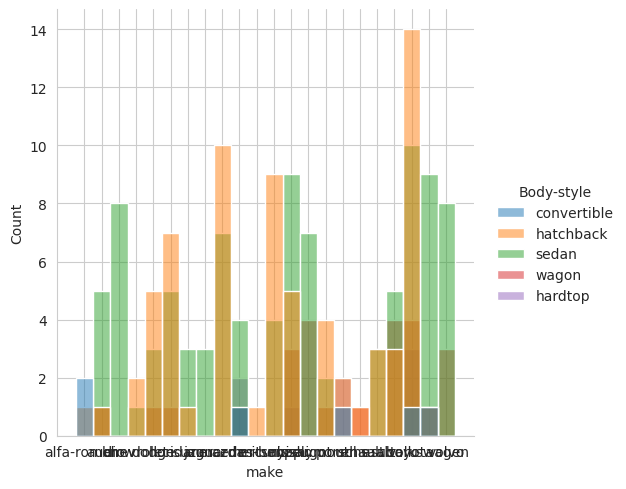

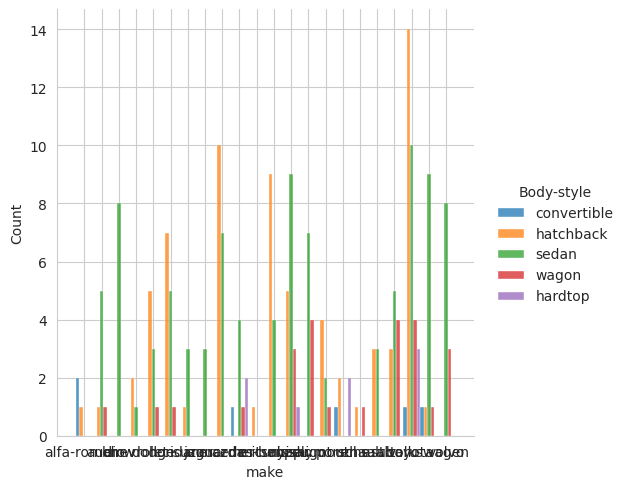

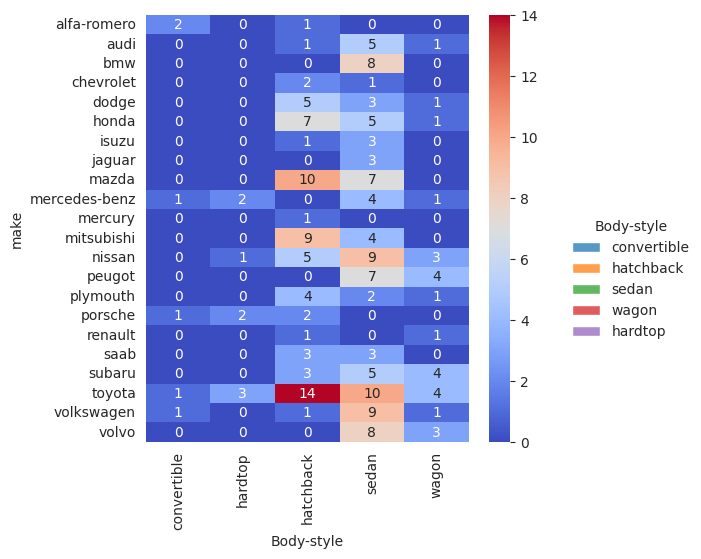

In [ ]:
# 練習題
# 找出不同車廠對於生產車子Body-style是否有偏好？

sns.displot(data=data, x='make', y='Body-style')
sns.displot(data=data, x='make')
sns.displot(data=data, x='Body-style')

sns.displot(data,x='make', hue='Body-style') #方法1
sns.displot(data,x='make', hue='Body-style', multiple="dodge") #方法2
sns.displot(data,x='make', hue='Body-style', multiple="dodge", stat="density") #方法3

matrix = data.groupby(['make','Body-style']).size().unstack(fill_value=0)
print(matrix)
sns.heatmap(matrix, annot=True, cmap='coolwarm', cbar=True)

plt.show()

Body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon          12371.960000
Name: price, dtype: float64
Body-style
convertible    11187.802193
hardtop        14555.520749
hatchback       4148.864162
sedan           8523.210259
wagon           5120.948695
Name: price, dtype: float64


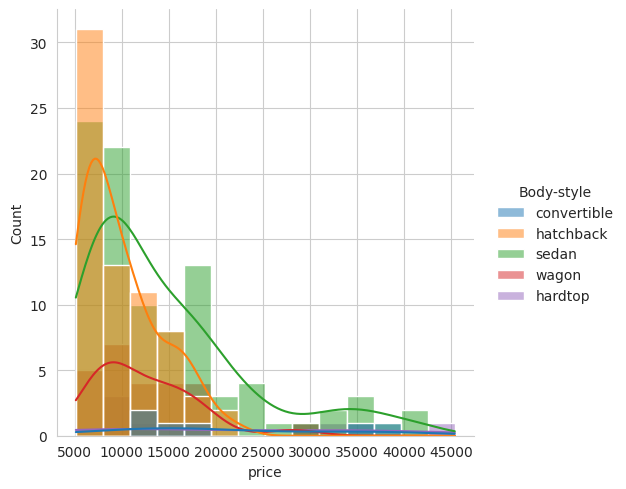

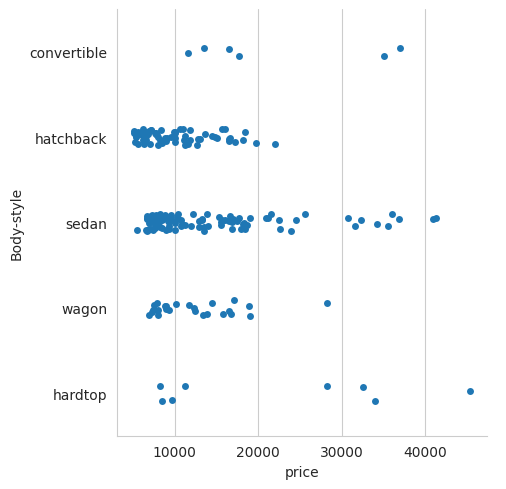

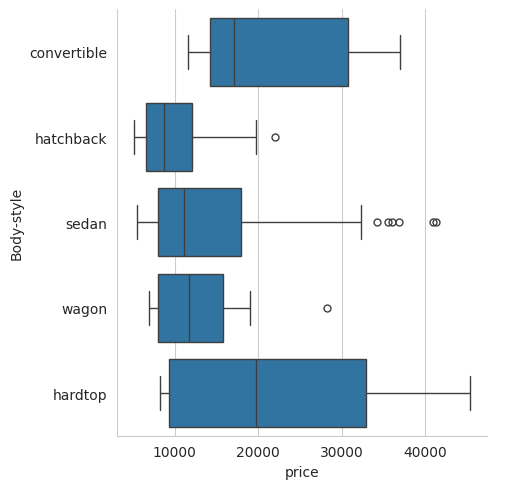

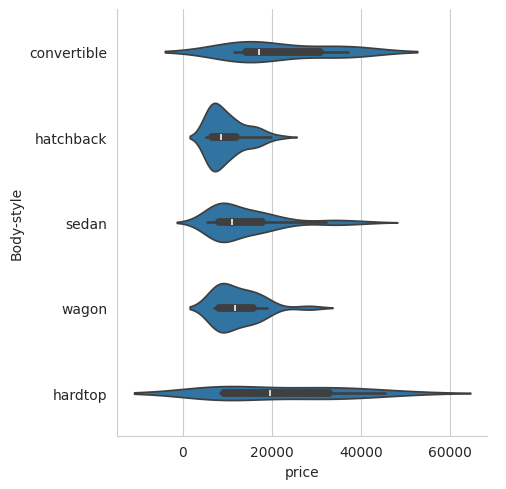

In [ ]:
# 練習題
# 找出Body-style是否會影響車價？

print(data.groupby('Body-style')['price'].mean())
print(data.groupby('Body-style')['price'].std())

# 畫直方圖
sns.displot(data=data, x='price', hue='Body-style', kde=True)

# 畫分布圖
sns.catplot(data=data, x='price', y='Body-style')

sns.catplot(data, x="price", y="Body-style", kind="box") # 盒鬚圖
sns.catplot(data, x="price", y="Body-style", kind="violin") # 小提琴圖

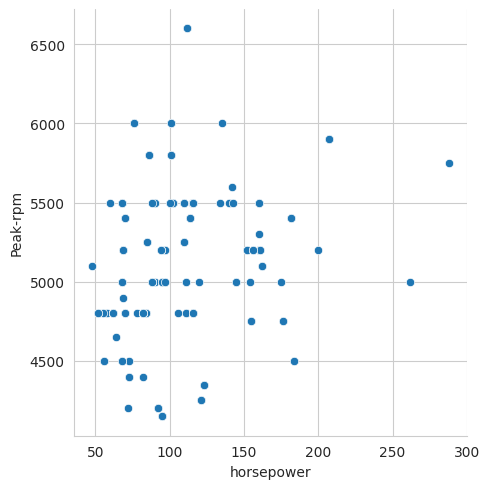

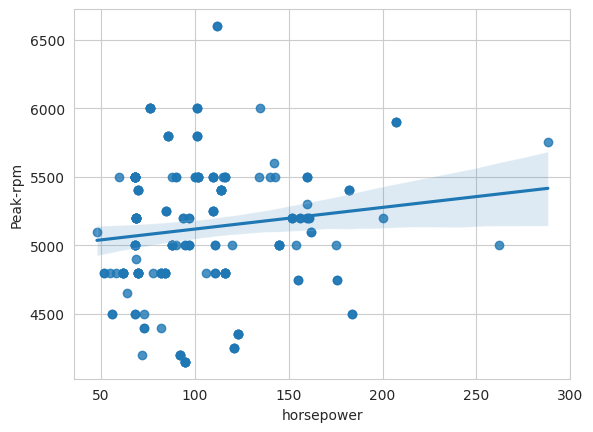

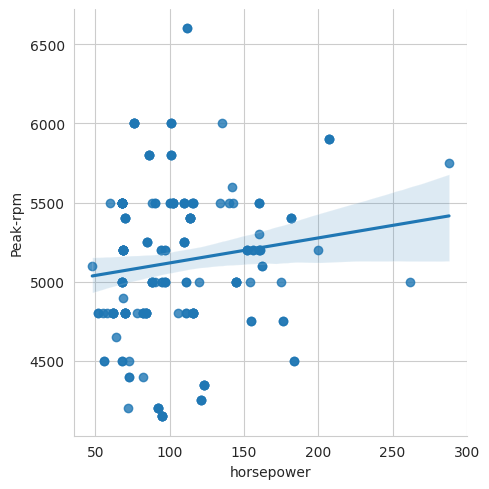

相關性係數= 0.13097080454313337
相關性係數矩陣=             Peak-rpm  horsepower
Peak-rpm    1.000000    0.130971
horsepower  0.130971    1.000000


In [ ]:
# 練習題
# 找出最高時數跟馬力之間是否有關係？
sns.relplot(data, x="horsepower", y="Peak-rpm") #方法1
plt.show()
sns.regplot(data, x="horsepower", y="Peak-rpm") #方法2
plt.show()
sns.lmplot(data, x="horsepower", y="Peak-rpm") #方法3
plt.show()

print('相關性係數=', data['Peak-rpm'].corr(data['horsepower']) ) # 方法1
print('相關性係數矩陣=', data[['Peak-rpm', 'horsepower']].corr()) # 方法2

In [ ]:
# 練習題
# 根據 車廠與車型(Body-style)的不同，計算各個組合的平均價格
mean_price = data.groupby(['make','Body-style'])['price'].mean().reset_index(name='MeanPrice')
print(mean_price)

             make   Body-style     MeanPrice
0     alfa-romero  convertible  14997.500000
1     alfa-romero    hatchback  16500.000000
2            audi    hatchback           NaN
3            audi        sedan  17647.000000
4            audi        wagon  18920.000000
5             bmw        sedan  26118.750000
6       chevrolet    hatchback   5723.000000
7       chevrolet        sedan   6575.000000
8           dodge    hatchback   7819.800000
9           dodge        sedan   7619.666667
10          dodge        wagon   8921.000000
11          honda    hatchback   7054.428571
12          honda        sedan   9945.000000
13          honda        wagon   7295.000000
14          isuzu    hatchback  11048.000000
15          isuzu        sedan   6785.000000
16         jaguar        sedan  34600.000000
17          mazda    hatchback  10085.000000
18          mazda        sedan  11464.142857
19  mercedes-benz  convertible  35056.000000
20  mercedes-benz      hardtop  36788.000000
21  merced

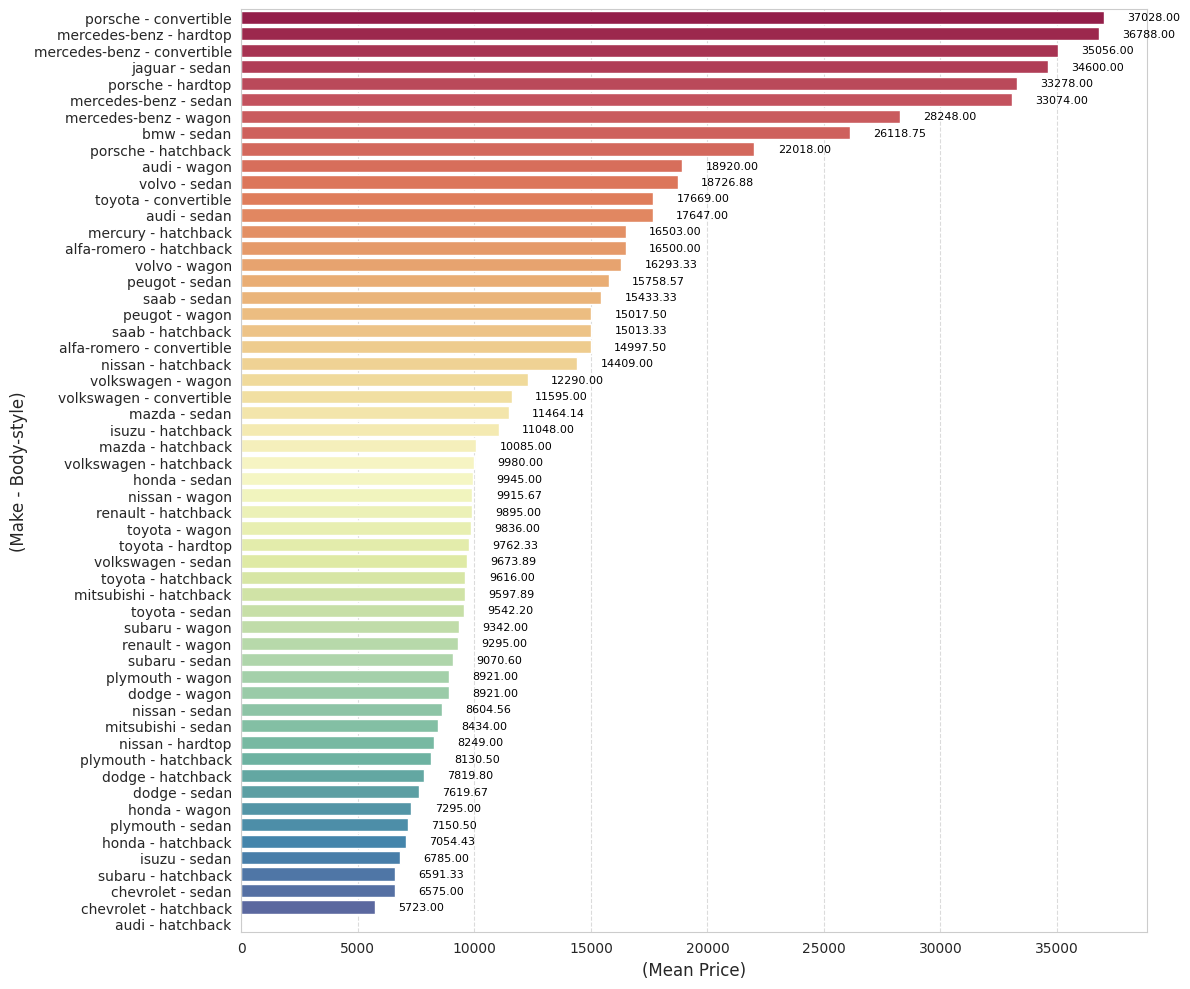

In [3]:
mean_price_df = data.groupby(['make', 'Body-style'])['price'].mean().reset_index(name='MeanPrice')

# 創建一個新的欄位，結合 'make' 和 'Body-style'，用於Y軸顯示
mean_price_df['Make_BodyStyle'] = mean_price_df['make'] + " - " + mean_price_df['Body-style']

# 依照平均價格由高到低排序，並且重設索引 (這樣迴圈中的 index 才能正確對應Y軸位置)
mean_price_sorted_df = mean_price_df.sort_values(by='MeanPrice', ascending=False).reset_index(drop=True)

# 繪製長條圖
plt.figure(figsize=(12, 10)) # 設定圖表大小
ax = sns.barplot(data=mean_price_sorted_df, x='MeanPrice', y='Make_BodyStyle', hue='Make_BodyStyle', palette='Spectral', legend=False)

# 在每個長條圖旁邊標註平均價格數值
for index, row in mean_price_sorted_df.iterrows():
    # index 現在是 0, 1, 2...，對應長條圖中Y軸的類別位置
    ax.text(row['MeanPrice'] + 1000,  # X座標：平均價格值加上偏移量
            index,                    # Y座標：使用重設後的索引，對應Y軸位置
            f"{row['MeanPrice']:.2f}",# 顯示的文本：平均價格
            color='black',
            ha="left",
            va="center",
            fontsize=8) # 可調整字體大小

# 設定圖表標題和座標軸標籤
plt.xlabel('(Mean Price)', fontsize=12)
plt.ylabel('(Make - Body-style)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7) # 添加水平網格線
plt.tight_layout() # 自動調整版面

plt.show()